#  Лабораторная работа 1
##  Кознев Никита (Вариант 8)
### РЕШЕНИЕ КРАЕВЫХ ЗАДАЧ МЕТОДОМ РАЗНОСТНЫХ АППРОКСИМАЦИЙ
### Цель:

+ изучить метод разностных аппроксимаций, составить алгоритм метода
    и программу их реализации, получить численное решение заданной краевой задачи;
    
+ составить алгоритм решения краевых задач указанными методами, применимыми для организации вычислений на ПЭВМ;

+ составить программу решения краевых задач по разработанному алгоритму;

+ выполнить тестовые примеры и проверить правильность работы программ.

### Задание

Составить разностную схему и получить численное решение краевой за-
дачи с точностью **10^(-3)**:
− 1 ≤ x ≤ 1
y′′ + (1 + x 2 ) y = − 1,
ay′′ + (1 + bx 2 ) y = − 1
− 1 ≤ x ≤ 1.

### Исходные данные:
a = sin(k), b = cos(k) , где k = 8.
y(-1) = 0, y(1)=0

In [15]:
%matplotlib inline
import numpy as np
import math
import matplotlib
import random
from scipy.misc import derivative
from scipy import integrate
matplotlib.rc('figure', figsize=(12, 8))

##  Метод разностных аппроксимаций

In [4]:
def approx_method(n, a, b, y_a, y_b, f, p):
    x = np.linspace(a, b, num=n + 1)
    h = (b - a) / (n + 1)
    a_s = [-1] * (n - 1)
    c_s = [-(2 + h**2 * p(i)) for i in x[1:-1]]
    b_s = [-1] * (n - 1)
    f_s = [h ** 2 * f(i) for i in x[1:-1]]
    A_s = [0, b_s[0] / c_s[0]]
    B_s = [0, f_s[0] / c_s[0]]
    
    for i in range(1, n-2):
        A_s.append(b_s[i] / (c_s[i] - a_s[i] * A_s[i]))
        B_s.append((f_s[i] + a_s[i] * B_s[i]) / (c_s[i] - a_s[i] * A_s[i]))
        
    y = [y_b, (f_s[n - 4] + a_s[n - 4] * B_s[n - 4]) / (c_s[n - 4] - a_s[n - 4] * A_s[n - 4])]
    
    for (A, B) in list(zip(reversed(A_s), reversed(B_s)))[:-1]:
        y.append(A * y[-1] + B)
    
    y.append(y_a)
    y = list(reversed(y))
    
    return x, np.array(y)

In [20]:
%%timeit
x, y = approx_method(1000, -1, 1, 0, 0, lambda x: -1, lambda x: -(1 + x ** 2))

8.72 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


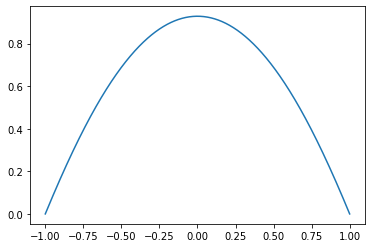

In [16]:
matplotlib.pyplot.plot(x, y)

In [21]:
%%time
k = 8
p = lambda x: -(1 + math.cos(k) * x**2) / math.sin(k)
f = lambda x: -1 / math.sin(k)
x1, y1 = approx_method(1000, -1, 1, 0, 0, f, p)

CPU times: user 13.2 ms, sys: 57 µs, total: 13.3 ms
Wall time: 14.9 ms


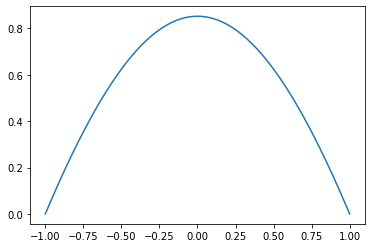

In [22]:
matplotlib.pyplot.plot(x1, y1)